In [1]:
import pandas as pd

In [2]:
import baseball

In [4]:
파일목록 = [
    'data/NC Dinos {}.xlsx'.format(y) for y in range(2013, 2015)]
NC시즌 = baseball.from_files(파일목록)

In [5]:
식당 = pd.read_excel('data/food_order.xlsx')

열의 값에 따라 분류하기

In [6]:
식당.groupby('corner')

In [7]:
식당.groupby('corner').size()

corner
after school      929
burger&pizza      913
grill & fry       925
noodle bar        923
rice & soup 1    1422
rice & soup 2     332
take out         1381
dtype: int64

In [11]:
식당.groupby('corner')['use_count'].mean()

corner
after school     140.921421
burger&pizza     144.285871
grill & fry      225.996757
noodle bar       179.244854
rice & soup 1    221.974684
rice & soup 2    241.897590
take out         190.789283
Name: use_count, dtype: float64

가독성을 높이는 코드 작성

In [12]:
식당 = 식당.rename(columns={
        'corner': '코너', 'use_count': '주문수량'
    })

In [13]:
코너별 = 식당.groupby('코너')

In [14]:
코너별['주문수량'].mean()

코너
after school     140.921421
burger&pizza     144.285871
grill & fry      225.996757
noodle bar       179.244854
rice & soup 1    221.974684
rice & soup 2    241.897590
take out         190.789283
Name: 주문수량, dtype: float64

단일 열도 데이터프레임 형식으로 표현

In [15]:
코너별['주문수량']

In [17]:
코너별[['주문수량']].mean()

,주문수량
코너,
after school,140.921421
burger&pizza,144.285871
grill & fry,225.996757
noodle bar,179.244854
rice & soup 1,221.974684
rice & soup 2,241.897590
take out,190.789283


In [19]:
코너별.mean()

,주문수량,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday
코너,,,,,,,,,,,
after school,140.921421,54.617869,7.728741,5.551130,2.776103,0.528525,-78.574812,2014.093649,6.519914,16.118407,1.939720
burger&pizza,144.285871,64.123768,9.052574,7.107338,3.124863,0.745893,-71.109529,2014.105148,6.465498,16.032859,1.940854
grill & fry,225.996757,89.886486,11.281081,9.498378,5.041081,1.370811,-124.829189,2014.095135,6.505946,16.105946,1.931892
noodle bar,179.244854,69.404117,9.653304,9.533044,4.211268,1.247021,-100.187432,2014.096425,6.479957,16.035753,1.926327
rice & soup 1,221.974684,74.936709,10.759494,8.064698,3.441632,0.879044,-136.278481,2014.089311,6.530239,16.028129,1.940928
rice & soup 2,241.897590,149.231928,15.722892,18.322289,8.210843,1.614458,-76.942771,2014.397590,6.042169,16.162651,1.930723
take out,190.789283,58.929761,2.302679,0.199131,0.068791,0.020999,-129.556843,2014.127444,6.444605,16.013758,1.946416


한식, 양식, 기타로 분류하기

In [20]:
분류사전 = {
    'rice & soup 1': '한식', 'rice & soup 2': '한식',
    'burger&pizza': '양식'
}

분류 = 식당.코너.map(분류사전)
분류 = 분류.fillna('기타')
분류.value_counts()

기타    4158
한식    1754
양식     913
Name: 코너, dtype: int64

색인이 일치한다면, 데이터프레임에 포함되지 않은 시리즈도 분류에 활용할 수 있습니다.

In [21]:
분류별 = 식당.groupby(분류)

In [23]:
분류별['주문수량'].mean().sort_values()[::-1]

코너
한식    225.745724
기타    184.917268
양식    144.285871
Name: 주문수량, dtype: float64

두 개 이상의 기준으로 분류하기

In [24]:
분류별코너별 = 식당.groupby([분류,'코너'])

In [33]:
분류별코너별[['주문수량']].mean().ix[['한식', '양식', '기타']]

주문수량
코너 코너                       
한식 rice & soup 1  221.974684
   rice & soup 2  241.897590
양식 burger&pizza   144.285871
기타 after school   140.921421
   grill & fry    225.996757
   noodle bar     179.244854
   take out       190.789283

#### 연습

각 지역별 평균 기온 산출

1. 가독성을 높이기 위해 열제목을 적절한 우리말로 설정
1. 지역별 연도별 평균 기온 산출

In [34]:
날씨 = pd.read_excel('data/weather.xlsx')

In [35]:
날씨 = 날씨.rename(
    columns={'location':'지역', 'avgTemp':'일평균'})

In [36]:
날씨.지역 = 날씨.지역.replace({'seoul':'서울', 'suwon':'수원'})

In [37]:
지역별 = 날씨.groupby('지역')

In [38]:
지역별['일평균'].mean()

지역
서울    13.365616
수원    13.167123
Name: 일평균, dtype: float64

In [39]:
연도 = 날씨.date.map(lambda 날짜: 날짜.year)
연도.name = '연도'
연도[:3]

0    2013
1    2013
2    2013
Name: 연도, dtype: int64

In [41]:
지역별연도별 = 날씨.groupby(['지역', 연도])

In [44]:
지역별연도별[['일평균']].mean()

일평균
지역 연도             
서울 2013  14.241176
   2014  13.396712
   2015  12.680189
수원 2013  14.192810
   2014  13.145479
   2015  12.464151

### 그룹 순회

In [48]:
list(지역별연도별)[0]

,지역,date,weekDay,일평균,highestTemp,lowestTemp,precipitation,snow,windSpeed,humidity,cloud,dayTime,weather
0,서울,2013-08-01,thur,28.0,32.1,24.5,-,-,1.8,66,7.1,6.0,구름많음
1,서울,2013-08-02,fri,27.4,29.3,25.2,7.5,-,2.1,79,9.1,0.9,흐림/안개/비
2,서울,2013-08-03,sat,28.9,32.6,26.7,0.1,-,3.6,72,8.1,8.9,흐림/소나기
3,서울,2013-08-04,sun,28.3,31.3,26.4,4.5,-,2.5,76,8.0,4.7,흐림/소나기/안개
4,서울,2013-08-05,mon,27.7,30.1,26.4,7,-,3.3,78,7.0,4.5,구름많음/안개/천둥번개/비
5,서울,2013-08-06,tue,26.4,27.6,23.0,45,-,2.3,81,6.6,2.8,구름많음/안개/천둥번개/비
6,서울,2013-08-07,wed,28.7,32.1,25.0,-,-,2.2,73,7.5,1.3,구름많음
7,서울,2013-08-08,thur,29.3,32.8,27.3,-,-,3.9,73,7.4,5.0,구름많음/안개
8,서울,2013-08-09,fri,29.2,30.8,27.9,0,-,4.0,79,9.9,0.1,흐림/안개
9,서울,2013-08-10,sat,28.0,29.4,25.8,2,-,2.3,81,7.1,2.6,구름많음/안개/천둥번개/비


In [50]:
for 그룹명, 그룹 in 지역별연도별:
    print('{}, 크기:{}'.format(그룹명, len(그룹)))

('서울', 2013), 크기:153
('서울', 2014), 크기:365
('서울', 2015), 크기:212
('수원', 2013), 크기:153
('수원', 2014), 크기:365
('수원', 2015), 크기:212


### 함수로 묶기

* 함수는 색인에 대해 적용됩니다.

In [51]:
식당 = 식당.set_index('date')

월별로 묶기

In [60]:
분류방법 = lambda 날짜: '{}-{:02d}'.format(날짜.year, 날짜.month)
월별 = 식당.groupby(분류방법)

In [61]:
월별['주문수량'].mean()[:3]

2013-08    253.843972
2013-09    249.778723
2013-10    237.687919
Name: 주문수량, dtype: float64

#### 연습

식당 주문 기록의 월별 코너별 주문수량 평균 집계

In [92]:
def 월간코너(색인):
    날짜, 코너 = 색인    
    월 = '{}-{:02d}'.format(날짜.year, 날짜.month)
    return 월, 코너

In [70]:
프레임 = 식당.set_index('코너', append=True)
프레임.groupby(월간코너)[['주문수량']].mean()

,주문수량
"(2013-08, after school)",154.333333
"(2013-08, burger&pizza)",188.352941
"(2013-08, grill & fry)",299.565217
"(2013-08, noodle bar)",221.695652
"(2013-08, rice & soup 1)",330.976190
"(2013-08, take out)",230.600000
"(2013-09, after school)",152.138889
"(2013-09, burger&pizza)",156.700000
"(2013-09, grill & fry)",327.096774
"(2013-09, noodle bar)",224.419355


## 분류별 집계

In [81]:
for 연도, 프레임 in zip(range(2013, 2016), NC시즌):
    프레임['시즌'] = 연도

TypeError: 'str' object does not support item assignment

In [73]:
NC시즌 = pd.concat(NC시즌)

In [75]:
NC시즌 = NC시즌.set_index('시즌', append=True)
NC시즌 = NC시즌.swaplevel(0, 1)

In [77]:
시즌별 = NC시즌.groupby(level='시즌')

In [82]:
시즌별.describe()

타석          안타         홈런
시즌                                           
2013 count   20.000000   20.000000  20.000000
     mean   177.450000   40.700000   3.150000
     std    197.772723   46.741281   5.659412
     min      1.000000    0.000000   0.000000
     25%      6.500000    1.000000   0.000000
     50%    103.500000   22.500000   0.000000
     75%    373.500000   75.500000   3.250000
     max    546.000000  129.000000  20.000000
2014 count   20.000000   20.000000  20.000000
     mean   203.850000   51.950000   6.950000
     std    222.860654   59.242121  10.937502
     min      1.000000    0.000000   0.000000
     25%      4.500000    0.750000   0.000000
     50%     80.000000   17.000000   1.000000
     75%    473.750000  111.250000   6.250000
     max    536.000000  157.000000  37.000000

사용자 정의 함수

In [83]:
def 최대최소차(시리즈):
    return 시리즈.max() - 시리즈.min()

In [84]:
시즌별.agg(최대최소차)

,타석,안타,홈런
시즌,,,
2013,545,129,20
2014,535,157,37


In [85]:
선수별 = NC시즌.groupby(level='선수명')

In [86]:
선수별.sum()

,타석,안타,홈런
선수명,,,
강구성,2,0,0
강민국,3,0,0
강진성,3,1,0
권희동,252,63,7
김동건,17,2,1
김성욱,30,5,1
김종찬,7,1,0
김종호,546,129,0
김준완,5,2,0


In [87]:
선수별.agg('sum')

,타석,안타,홈런
선수명,,,
강구성,2,0,0
강민국,3,0,0
강진성,3,1,0
권희동,252,63,7
김동건,17,2,1
김성욱,30,5,1
김종찬,7,1,0
김종호,546,129,0
김준완,5,2,0


열마다 다른 함수 적용하기

In [89]:
선수별.agg({'타석': 최대최소차, '안타': ['sum', 'mean']})

안타           타석
      sum   mean 최대최소차
선수명                   
강구성     0    0.0     0
강민국     0    0.0     0
강진성     1    1.0     0
권희동    63   63.0     0
김동건     2    2.0     0
김성욱     5    2.5    22
김종찬     1    1.0     0
김종호   129  129.0     0
김준완     2    2.0     0
김태우     1    1.0     0
나성범   255  127.5    78
노진혁     3    3.0     0
마낙길     9    4.5    29
모창민   219  109.5    32
박명환*    0    0.0     0
박민우   135   67.5   443
박정준    41   41.0     0
손시헌    90   90.0     0
이상호    31   31.0     0
이승호     0    0.0     0
이종욱   126  126.0     0
이창섭     0    0.0     0
이현곤    38   38.0     0
이호준   238  119.0     8
조영훈   136   68.0   302
조평호    21   10.5    84
지석훈   126   63.0   118
차화준    24   24.0     0
최재원     0    0.0     0
테임즈   152  152.0     0
허준      5    5.0     0

Q: 함수의 인자가 함수?

1. 함수 정의는 객체
1. 객체는 변수에 저장할 수 있다.
1. 함수의 인자는 지역변수이다.

따라서, 함수의 정의는 다른 함수의 인자가 될 수 있다.

In [99]:
print('안녕하세요')

안녕하세요


In [100]:
출력 = print

In [101]:
출력('안녕하세요')

안녕하세요


In [95]:
def 집계(데이터, 방법):
    결과 = 방법(데이터)
    return 결과

In [96]:
데이터 = [1,2,3,4,5]

In [97]:
집계(데이터, sum)

15

In [98]:
집계(데이터, max)

5

타율 상위 10%

In [102]:
def 상위타율(그룹, 백분위수=0.9):
    타수합계 = 그룹.안타 + 그룹.홈런
    백분위값 = 타수합계.quantile(백분위수)
    상위그룹 = 그룹[타수합계 > 백분위값]
    상위그룹 = 상위그룹.sort_values(
        by=['안타', '홈런'], ascending=False)
    return 상위그룹

In [104]:
시즌별.apply(상위타율).reset_index(0, drop=True)

타석   안타  홈런
시즌   선수명              
2013 김종호  546  129   0
     이호준  508  123  20
2014 나성범  536  157  30
     테임즈  514  152  37

## 2012 미국 대선

In [105]:
fec = pd.read_csv('data/pydata-book/us_presidental.csv')

C:\Users\student\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [106]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [107]:
fec.ix[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [108]:
fec = fec.rename(columns={'cand_nm': '후보자'})

In [118]:
후보자명단 = fec.후보자.drop_duplicates().reset_index(drop=True)

In [119]:
후보자명단

0                 Bachmann, Michelle
1                       Romney, Mitt
2                      Obama, Barack
3     Roemer, Charles E. 'Buddy' III
4                  Pawlenty, Timothy
5                 Johnson, Gary Earl
6                          Paul, Ron
7                     Santorum, Rick
8                       Cain, Herman
9                     Gingrich, Newt
10              McCotter, Thaddeus G
11                     Huntsman, Jon
12                       Perry, Rick
Name: 후보자, dtype: object

In [123]:
정당사전 = {
    'Obama, Barack': '민주당',
    'Romney, Mitt': '공화당'
}

In [124]:
정당 = fec.후보자.map(정당사전)

In [125]:
정당.value_counts()

민주당    593746
공화당    107229
Name: 후보자, dtype: int64

In [126]:
fec['정당'] = 정당

환급금 제외

In [127]:
fec = fec.rename(columns={'contb_receipt_amt': '액수'})

In [129]:
fec = fec[fec.액수 > 0]

오바마와 롬니

In [181]:
오바롬니 = fec[
    fec.후보자.isin(['Obama, Barack', 'Romney, Mitt'])]

In [131]:
len(오바롬니)

694282

"어떤 직업을 가진 사람들이 누구를 지지했나?"

In [182]:
오바롬니 = 오바롬니.rename(columns={'contbr_occupation': '직업'})

기부자 직업 상위 10

In [184]:
오바롬니.직업.value_counts()[:10]

RETIRED         177473
NOT PROVIDED     37292
ATTORNEY         30133
HOMEMAKER        19626
PHYSICIAN        17206
PROFESSOR        11804
TEACHER          11512
CONSULTANT       10061
NOT EMPLOYED      9696
LAWYER            7438
Name: 직업, dtype: int64

In [134]:
def 명칭정리(직업명):
    직업사전 = {
        'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
        'INFORMATION REQUESTED':'NOT PROVIDED',
        'INFORMATION REQUESTED (BEST EFFORTS)':'NOT PROVIDED',
        'C.E.O.':'CEO'
    }
    return 직업사전.get(직업명, 직업명)

In [185]:
오바롬니.직업 = 오바롬니.직업.map(명칭정리)
오바롬니.직업.value_counts()[:10]

RETIRED         177473
NOT PROVIDED     37292
ATTORNEY         30133
HOMEMAKER        19626
PHYSICIAN        17206
PROFESSOR        11804
TEACHER          11512
CONSULTANT       10061
NOT EMPLOYED      9696
LAWYER            7438
Name: 직업, dtype: int64

In [141]:
오바롬니 = 오바롬니.rename(columns={
        'contbr_employer': '고용주'
    })

In [176]:
오바롬니[:3]

,cmte_id,cand_id,후보자,contbr_nm,contbr_city,contbr_st,contbr_zip,고용주,직업,액수,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,정당
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,NaN,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,공화당
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,NaN,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,공화당
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,9.128e+07,DEFENSE INTELLIGENCE AGENCY,NaN,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,공화당


In [154]:
고용주 = 오바롬니.고용주.dropna()
고용주[고용주.str.startswith('INFORMATION REQUESTED')] = 'NOT PROVIDED'
고용주[고용주.str.lower().str.startswith('SELF')] = 'SELF-EMPLOYED'
고용주.value_counts()[:10]

RETIRED              173287
SELF-EMPLOYED         79638
NOT EMPLOYED          45727
NOT PROVIDED          38628
HOMEMAKER             12081
OBAMA FOR AMERICA      1741
STUDENT                1417
SELF                   1228
DISABLED               1096
IBM                    1027
Name: 고용주, dtype: int64

In [155]:
오바롬니['고용주'] = 고용주

In [186]:
오바롬니[['후보자', '직업', '정당']][:3]

,후보자,직업,정당
411,"Romney, Mitt",FOREIGN SERVICE OFFICER,공화당
412,"Romney, Mitt",FOREIGN SERVICE OFFICER,공화당
413,"Romney, Mitt",INTELLIGENCE ANALYST,공화당


In [187]:
직업별정당별 = 오바롬니.groupby(['직업', '정당'])

In [188]:
직업별정당별['액수'].sum().unstack()[:10]

정당,공화당,민주당
직업,,
MIXED-MEDIA ARTIST / STORYTELLER,NaN,100.0
AREA VICE PRESIDENT,NaN,250.0
RESEARCH ASSOCIATE,NaN,100.0
TEACHER,NaN,500.0
THERAPIST,NaN,3900.0
-,NaN,5000.0
.NET PROGRAMMER,NaN,481.0
07/13/1972,NaN,98.0
12K ADVOCATE,NaN,150.0


In [189]:
직업별정당별_기부금합계 = 오바롬니.pivot_table(
    '액수', aggfunc='sum', index='직업', columns='정당')

In [161]:
직업별정당별_기부금합계[:20]

정당,공화당,민주당
직업,,
MIXED-MEDIA ARTIST / STORYTELLER,NaN,100.0
AREA VICE PRESIDENT,NaN,250.0
RESEARCH ASSOCIATE,NaN,100.0
TEACHER,NaN,500.0
THERAPIST,NaN,3900.0
-,NaN,5000.0
.NET PROGRAMMER,NaN,481.0
07/13/1972,NaN,98.0
12K ADVOCATE,NaN,150.0


큰손

In [190]:
부자직업 = 직업별정당별_기부금합계[
    직업별정당별_기부금합계.sum(1) > 2*10**6]

In [191]:
부자직업[:10]

정당,공화당,민주당
직업,,
ATTORNEY,5364718.82,11141982.97
CEO,2324297.03,2074974.79
CONSULTANT,1424894.01,2459912.71
EXECUTIVE,2300947.03,1355161.05
HOMEMAKER,8147446.22,4248875.80
INVESTOR,1537595.12,884133.00
LAWYER,7705.20,3160478.87
NOT PROVIDED,11396894.84,4866973.96
PHYSICIAN,1368023.96,3735124.94


In [192]:
%matplotlib inline

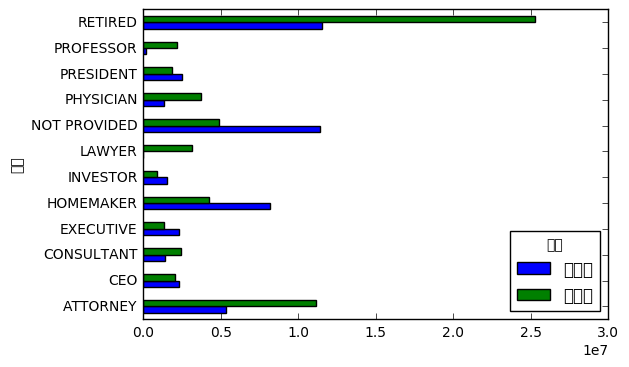

In [195]:
부자직업.plot(kind='barh')

"오바마, 롬니 어떤 직업들이 많이 지지했을까?"

In [196]:
후보별 = 오바롬니.groupby('후보자')

In [197]:
def get_top_amounts(group, key, n=5):
    # key로 지정된 열 기준으로 분류해 기부금 액수 합계 산출
    totals = group.groupby(key)['액수'].sum()
    return totals.sort_values()[::-1][-n:]

In [199]:
후보별.apply(get_top_amounts, '직업', n=7).unstack(0)

후보자,"Obama, Barack","Romney, Mitt"
직업,,
3RD GENERATION FAMILY BUSINESS OWNER,NaN,3.0
ADMINISTRATION/INSTRUCTOR,3.0,NaN
AFFORDABLE REAL ESTATE DEVELOPER,NaN,3.0
CHICKEN GRADER,NaN,5.0
COMPUTER ASSISTANT,3.0,NaN
DIRECTOR REISCHAUER CENTER FOR EAST A,NaN,5.0
IFC CONTRACTING SOLUTIONS,NaN,3.0
INDEPENDENT PROFESSIONAL,NaN,3.0
LAN/WAN ANALYST,3.0,NaN


In [200]:
기부금액구간 = [0, 1, 10, 100, 1000, 10**4, 10**5, 10**6, 10**7]
labels = pd.cut(오바롬니.액수, 기부금액구간)

In [203]:
labels.value_counts()

(10, 100]              404133
(100, 1000]            197348
(1000, 10000]           48470
(1, 10]                 43751
(0, 1]                    570
(1000000, 10000000]         4
(100000, 1000000]           3
(10000, 100000]             3
Name: 액수, dtype: int64

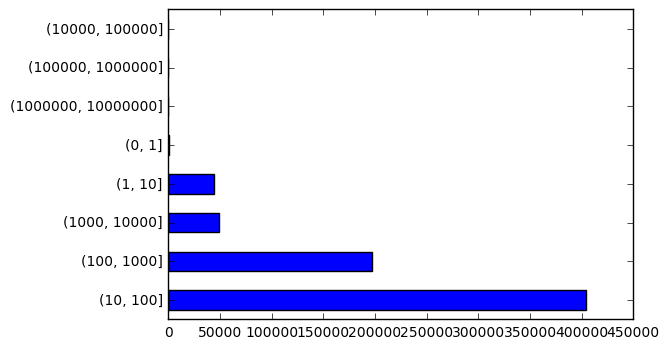

In [205]:
labels.value_counts().plot(kind='barh')

"오바마는 소액 기부자들의 지지를 많이 받았나?"

In [206]:
후보별기부금액단위별 = 오바롬니.groupby(['후보자', labels])

In [209]:
후보별기부금액단위별.size().unstack(0)

후보자,"Obama, Barack","Romney, Mitt"
액수,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN
